In [2]:
import requests
res = requests.get('https://www.taipower.com.tw/d006/Meter/js/loadpara.js')
res.text

'var colrs = ["#33CC33", "#FFCC00", "#FF0000"]; // Green, Yellow, Red\r\nvar loadInfo = [\r\n"3,392.8",\r\n"3,700.0",\r\n"4,088.7",\r\n"109.08.25(二)09:20更新"\r\n]\r\n<!--Current System Load-->\r\n<!--109-8-25 9:20-->\r\n'

In [9]:
res.text.split('Info = [')[1].split(']')[0].split('\r\n')[1]

'"3,392.8",'

In [12]:
eval(res.text.split('Info = ')[1].split('<!')[0])

['3,392.8', '3,700.0', '4,088.7', '109.08.25(二)09:20更新']

In [22]:
import requests
fueltype = requests.get('https://www.taipower.com.tw/d006/loadGraph/loadGraph/data/loadfueltype.csv')
#fueltype.text

In [16]:
import requests
fueltype1 = requests.get('https://www.taipower.com.tw/d006/loadGraph/loadGraph/data/loadfueltype_1.csv')
#fueltype1.text

In [19]:
a = "00:00,383.1,928.4,125.7,281.0,910.2,0.0,26.2,0.0,20.3,13.8,0.0,30.5,-0.5,0.0"
len(a.split(','))

15

In [21]:
valueSum = 0
for pop in a.split(',')[1:14]:
  valueSum += float(pop)
round(valueSum,1)

2718.7

In [23]:
import requests
fueltype = requests.get('https://www.taipower.com.tw/d006/loadGraph/loadGraph/data/loadfueltype.csv')


In [28]:
rows = fueltype.text.split('\r\n')
dataProvider = []
for row in rows:
  valueSum = 0
  fields = row.split(',')
  if len(fields) == 15:
    for pop in fields[1:14]:
      valueSum += float(pop)
    dataProvider.append({'dt':fields[0],'value':round(valueSum,1)})

In [30]:
import pandas
today_power = pandas.DataFrame(dataProvider)

In [31]:
today_power

,dt,value
0,00:00,3007.4
1,00:10,2993.2
2,00:20,2938.5
3,00:30,2924.1
4,00:40,2897.8
...,...,...
57,09:30,3379.3
58,09:40,3392.5
59,09:50,3416.3
60,10:00,3409.3


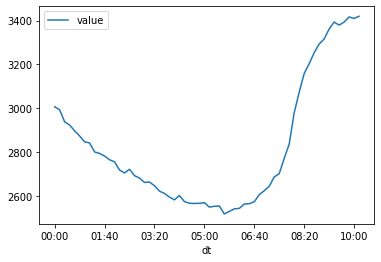

In [32]:
today_power.plot(kind = 'line', x = 'dt', y= 'value')

In [34]:
import requests
fueltype1 = requests.get('https://www.taipower.com.tw/d006/loadGraph/loadGraph/data/loadfueltype_1.csv')


In [37]:
rows = fueltype1.text.split('\r\n')
rows[0]

'00:00,383.1,928.4,125.7,281.0,910.2,0.0,26.2,0.0,20.3,13.8,0.0,30.5,-0.5,0.0'

In [40]:
dataProvider = []
for row in rows:
  valueSum = 0
  fields = row.split(',')
  if len(fields) == 15:
    for pop in fields[1:14]:
      valueSum += float(pop)
    dataProvider.append({'dt':fields[0],'value':round(valueSum,1)})


In [42]:
import pandas
yesterday_power = pandas.DataFrame(dataProvider)

In [43]:
yesterday_power

,dt,value
0,00:00,2718.7
1,00:10,2700.3
2,00:20,2690.2
3,00:30,2649.9
4,00:40,2640.4
...,...,...
139,23:10,3150.6
140,23:20,3107.0
141,23:30,3084.5
142,23:40,3053.2


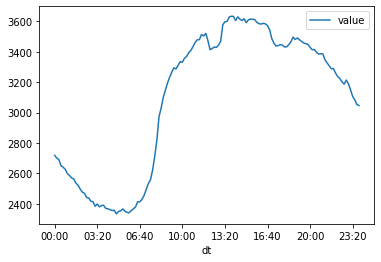

In [44]:
yesterday_power.plot(kind = 'line', x = 'dt', y = 'value')

In [46]:
taipower = pandas.merge(today_power, yesterday_power, how = 'outer', on = 'dt')

In [48]:
taipower.columns = ['time', 'today_power', 'yesterday_power']

In [49]:
taipower.head()

,time,today_power,yesterday_power
0,00:00,3007.4,2718.7
1,00:10,2993.2,2700.3
2,00:20,2938.5,2690.2
3,00:30,2924.1,2649.9
4,00:40,2897.8,2640.4


In [52]:
taipower.set_index('time', inplace=True, drop=True)

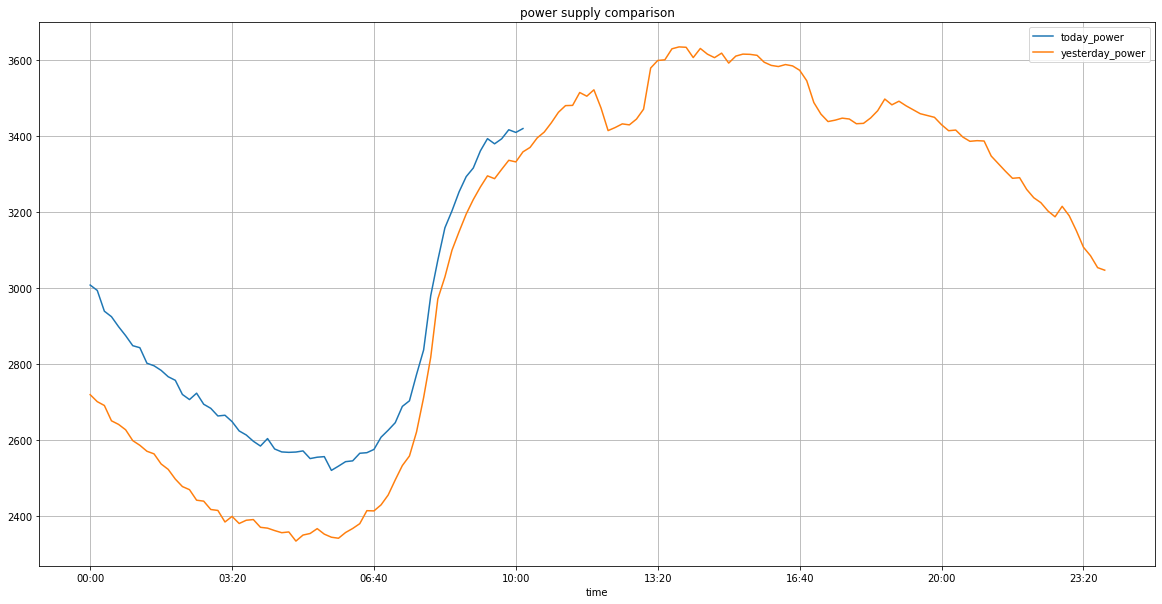

In [58]:
taipower.plot(kind='line', grid=True, figsize = [20,10], title='power supply comparison' )

In [70]:
import plotly.express as px

fig = px.line(taipower, x=taipower.index, y="today_power")
fig.add_scatter(x=taipower.index, y=taipower['yesterday_power'], mode='lines')
fig.show()

## Cron (Linux, MAC)
- http://linux.vbird.org/linux_basic/0430cron.php

## 工作排程(Windows)
- 工作排程器
